/tmp/ipykernel_31111/3054632983.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data = yf.download(tickers=self.config["combined_assets"],start=self.config['start_date'],end=self.config['end_date'])['Close']
[*********************100%***********************]  31 of 31 completed


Value at Risk: -0.04006936414903588
Conditional Value at Risk: -0.07154558273970676
 Returns: Ticker          AAPL      ARKK   BNB-USD   BTC-USD       DIA       EFA  \
Date                                                                     
2020-12-24  0.007712 -0.014301  0.045106  0.021281  0.002457  0.000415   
2020-12-28  0.035766 -0.024280  0.102889  0.141088  0.006555  0.008154   
2020-12-29 -0.013315 -0.026895  0.086715  0.010250 -0.001776  0.006443   
2020-12-30 -0.008527  0.022362 -0.020962  0.054034  0.002208  0.001362   
2020-12-31 -0.007702 -0.020535 -0.019935  0.005574  0.005458 -0.007617   
...              ...       ...       ...       ...       ...       ...   
2025-09-24 -0.008332 -0.001436  0.001797  0.011732 -0.003997 -0.005799   
2025-09-25  0.018073 -0.021927 -0.071781 -0.037760 -0.003449 -0.007129   
2025-09-26 -0.005489  0.018008  0.016083  0.006085  0.006203  0.007724   
2025-09-29 -0.004032  0.036943  0.072656  0.042726  0.001644  0.003886   
2025-09-30  0.0007

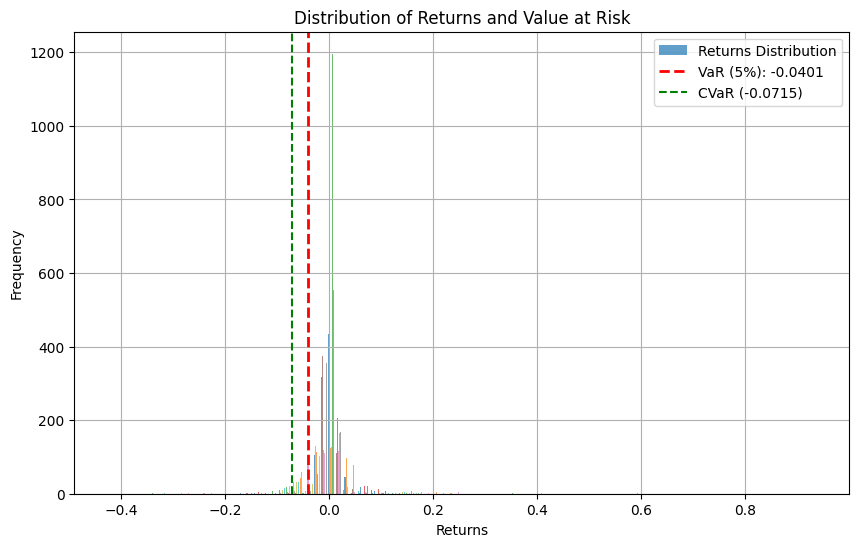

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.config import load_config
import yfinance as yf
import numpy as np



class Var:
    def __init__(self,config):
        self.config = config


        
    def load_data(self):
        """
        Loads in data from yfinance
        """
        self.data = yf.download(tickers=self.config["combined_assets"],start=self.config['start_date'],end=self.config['end_date'])['Close']
        self.data = self.data.dropna()
        self.data.drop_duplicates(inplace=True)
        return self.data

    
    def get_var(self,ci=0.95):
        """
        value at risk
        """
        #returns
        self.returns = self.data.pct_change().dropna()

        self.value_at_risk = np.percentile(self.returns,(1 - ci)*100)
        return self.value_at_risk
    
    def get_cvar(self,ci=0.95):
        """
        Conditional Value at Risk
        """



        tail_risk = self.returns[self.returns < self.value_at_risk]
        self.cvar = np.mean(tail_risk)
        return self.cvar
    
    def plot_returns(self):
        """ plot VaR, CVar and returns """

        print(f' Returns: {self.returns}')
        print(f'Value at Risk: {self.value_at_risk}')
        print(f'Conditional Value at Risk: {self.cvar:.4}%')
        plt.figure(figsize=(10, 6))
        plt.hist(self.returns, bins=100, label="Returns Distribution", alpha=0.7)
        plt.axvline(self.value_at_risk, color='r', linestyle='dashed', linewidth=2, label=f'VaR (5%): {self.value_at_risk:.4f}')
        plt.axvline(x=self.cvar, color='green', linestyle='--', label=f'CVaR ({self.cvar:.4f})')
        plt.title('Distribution of Returns and Value at Risk')
        plt.xlabel('Returns')
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    config = load_config()
    var_config = Var(config)
    var_config.load_data()
    var = var_config.get_var()
    print(f'Value at Risk: {var}')
    cvar = var_config.get_cvar()
    print(f'Conditional Value at Risk: {cvar}')
    var_config.plot_returns()
